

```
sebelum melakukan prediksi , download dataset melalui  link yang telah diberikan melalui wget!
```



In [0]:
!wget -O data_iris.csv https://tinyurl.com/fga-iris

--2019-07-30 02:37:17--  https://tinyurl.com/fga-iris
Resolving tinyurl.com (tinyurl.com)... 104.20.218.42, 104.20.219.42, 2606:4700:10::6814:da2a, ...
Connecting to tinyurl.com (tinyurl.com)|104.20.218.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://datahub.io/machine-learning/iris/r/iris.csv [following]
--2019-07-30 02:37:17--  https://datahub.io/machine-learning/iris/r/iris.csv
Resolving datahub.io (datahub.io)... 104.24.113.103, 104.24.112.103, 2606:4700:30::6818:7167, ...
Connecting to datahub.io (datahub.io)|104.24.113.103|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/machine-learning/iris/iris_csv/data/8bce8766530bf404228ea3fc026dfee3/iris_csv.csv [following]
--2019-07-30 02:37:17--  https://pkgstore.datahub.io/machine-learning/iris/iris_csv/data/8bce8766530bf404228ea3fc026dfee3/iris_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.24.113.103, 104.

![alt text](https://)

```
import library untuk membaca dataset dan melakukan modifikasi dataset lalu import dataset melalui read_csv dan head untuk membaca lima dataset teratas
```



In [0]:
import pandas as pd

dataset_iris = pd.read_csv('data_iris.csv')

dataset_iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


** *italicized text*Data Preprocessing**

ada beberapa tahapan dalam pemprosesan machine learning, dalam pertama adalah melakukan preprocessing data, sebelum melakukannya, lakukan peirntah info untuk mendapatkan informasi lebih jelas mengenai dataset

In [0]:
dataset_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepallength    150 non-null float64
sepalwidth     150 non-null float64
petallength    150 non-null float64
petalwidth     150 non-null float64
class          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


dari dataset, terlihat bahwa dataset tidak memiliki nilai null atau data kosong dan data semua(kecuali class) merupakan float atau jenis angka. untuk lebih jelas melihat apakah ada data kosng

In [0]:
dataset_iris.isnull().sum()

sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

terlihat tidak ada data kosong sehingga kita bisa menskip untuk proses menangani data kosong, selanjutnya bisa melakukan perintah dtypes untuk melihat tipe datanya

In [0]:
dataset_iris.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

dan terlihat bahwa selain kolom class semua berjenis angka sehingga tidak perlu dilakukan encoding atau memindahkan data dari string ke integer.  selanjutnya memisahkan antara data target dengan data yang digunakan untuk memperdiksi

In [0]:
data_x = dataset_iris[['sepallength', 'sepalwidth', 'petallength', 'petalwidth']] #untuk data yang digunakan sebagai prediksi

data_x.head()


,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


untuk data target yaitu bagian class, karena datanya bentuk  integer kita bisa merubahnya dalam bentuk angka

In [0]:
data_y = dataset_iris['class']

data_y.replace('Iris-setosa', 0, inplace = True)
data_y.replace('Iris-virginica', 1, inplace = True)
data_y.replace('Iris-versicolor', 2, inplace = True)

In [0]:
data_y.value_counts() # untuk melihat perubahannya

2    50
1    50
0    50
Name: class, dtype: int64

agar dapat digunakan dalam knn dan support vector machine data harus dirubah dalam bentuk array, menggunakan library numpy

In [0]:
import numpy as np

data_x = np.array(data_x)

data_x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [0]:
data_y = np.array(data_y)

data_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

karena algoritma knn dan svm sangat bergantung dengan jarak antar dataset, perlu dilakukan normalisasi atau standarisasi, yang kali ini menggunakan library sklearn data scaler

In [0]:
from sklearn import preprocessing

data_x = preprocessing.StandardScaler().fit(data_x).transform(data_x.astype(float))
data_x[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

dan terakhir, sebelum melakukan prediksi melalui knn dan support vector machine, data perlu di split menggunakan train test split, untuk membagi data menjadi data training dan data test, dalam memisahkan data ini, data dibagi  yaitu 80 % data training dan 20 % data testing

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data_x, data_y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


**Prediksi melalui k nearest neighbors**

knn atau k nearest neighbors sangat bergantung terhadap jumlah k yang didefinisi, terlalu sedikit k akan mengakibatkan unde-fitting namun jika terlalu tinggi nilai k nya akan mengakibatkan pverfitting sehingga diperlukan tuning hyperparameter untuk mendapatkan jumlah k terbaik

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1,30)
nilai ={}
nilai_list = []

for k in range_k:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  nilai[k] = metrics.accuracy_score(y_test, y_pred)
  nilai_list.append(metrics.accuracy_score(y_test, y_pred))

plot menggunakan matplotlib

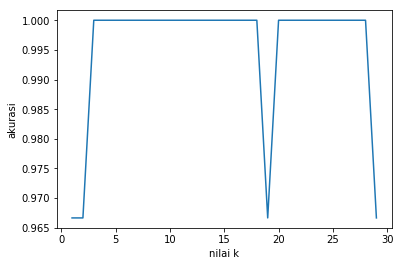

In [0]:
import matplotlib.pyplot as plt

plt.plot(range_k, nilai_list)
plt.xlabel('nilai k')
plt.ylabel('akurasi')
plt.show()

terlihat bahwa range antara 3 sampai 18 dan 20 sampai 30 memiliki nilai tertinggi, kita bisa menggunakan salah satunya untuk memprediksi nilainya

In [0]:
k = 25
 
k_nearest = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
k_nearest

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [0]:
y_predict = k_nearest.predict(X_test)

y_predict

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

setelah dilakukan prediksi kita bisa melihat akurasi dari model knn yang dibuat dengan menggunakan jaccard index dan confussion matrix

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

dari jaccard index di dapatkan nilai 1.0 atau 100 % sehingga model yang dibuat memiliki akurasi yang tinggi, karena semakin dekat nilai jaccard index dengan 1 maka akurasinya semakin tinggi

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



dalam classfication report juga didapatkan akurasi yang tinggi, yaitu 1

In [0]:

cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2])
np.set_printoptions(precision=2)

cnf_matrix

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]])

begitu juga dengan confussion matrix diatas dimana tidak ditemukan adanya kesalahan nilai, lbih jelasnya dapat dilihat di plot dibawah

Confusion matrix, without normalization
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


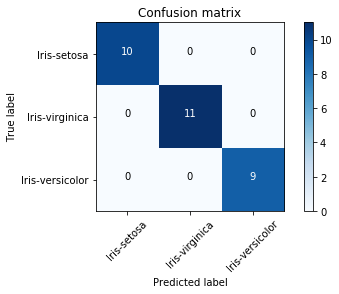

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-setosa','Iris-virginica','Iris-versicolor',],normalize= False,  title='Confusion matrix')

**Support Vector machine**

untuk support vector machine, import librarynya menggunakan sklearn. dan training model menggunakan data training

In [0]:
from sklearn import svm
vector_machine = svm.SVC(kernel='rbf', gamma='auto')
vector_machine.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

kemudian prediksi menggunakan x_test

In [0]:
y_predict = vector_machine.predict(X_test)

dari data diatas kemudian dilihat akurasi

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, y_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


1.0

dimana akurasinya didapatkan tepat  yaitu 1.0 atau memiliki akurasi yang tinggi.

In [0]:
print (classification_report(y_test, y_predict))

cnf_matrixs = confusion_matrix(y_test, y_predict, labels=[0,1,2])
np.set_printoptions(precision=2)

cnf_matrixs


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  9]])

dari data diatas didapatkan akurasi 100 % dimana model secara tepat dapat memprediksi class dari data yang diberikan. dimana lebih jelanya diperlihatkan dalam plot dibawah

Confusion matrix, without normalization
[[10  0  0]
 [ 0 11  0]
 [ 0  0  9]]


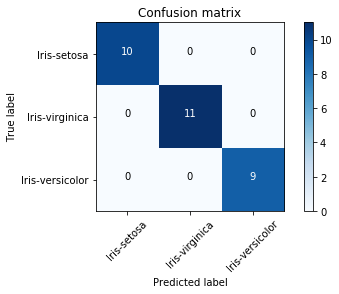

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plt.figure()
plot_confusion_matrix(cnf_matrixs, classes=['Iris-setosa','Iris-virginica','Iris-versicolor',],normalize= False,  title='Confusion matrix')